In [71]:
import pandas as pd
import dabest
import pathlib

result_df = pd.read_csv('/home/zied/workspace/other/recollection_hypothesis_redo/find_params/sdnn_origin_vs_backprop/comparison_bootstrap.csv')

In [72]:
keep_col = ['RANDOM_INIT', 'w_factor', 'std_init', 'APLUS', 'AMINUS', 
       'RANDOM_INIT.1','FOLD_ID', 'backprop_train_score', 'backprop_train_score_pot', 'backprop_test_score', 'backprop_test_score_pot', 'svm_train_score',
       'svm_test_score']
result_df = result_df[keep_col]

In [73]:
result_df

,RANDOM_INIT,w_factor,std_init,APLUS,AMINUS,RANDOM_INIT.1,FOLD_ID,backprop_train_score,backprop_train_score_pot,backprop_test_score,backprop_test_score_pot,svm_train_score,svm_test_score
0,0.59,0.55,0.05,0.00385,0.00165,0.5,2,0.972362,0.969849,0.971429,0.964286,0.983668,0.985714
1,0.59,0.55,0.05,0.00385,0.00165,0.5,3,0.979899,0.977387,0.967213,0.963934,0.991206,0.970492
2,0.59,0.55,0.05,0.00385,0.00165,0.5,9,0.973618,0.971106,0.957143,0.964286,0.981156,0.975000
3,0.59,0.55,0.05,0.00385,0.00165,0.5,4,0.969849,0.967337,0.975439,0.971930,0.979899,0.971930
4,0.59,0.55,0.05,0.00385,0.00165,0.5,1,0.951005,0.948492,0.985915,0.982394,0.983668,0.975352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.59,0.57,0.05,0.00399,0.00171,0.5,46,0.977387,0.982412,0.968085,0.964539,0.986181,0.989362
94,0.59,0.57,0.05,0.00399,0.00171,0.5,47,0.974874,0.973618,0.959044,0.962457,0.986181,0.979522
95,0.59,0.57,0.05,0.00399,0.00171,0.5,48,0.974874,0.973618,0.967972,0.964413,0.987437,0.971530
96,0.59,0.57,0.05,0.00399,0.00171,0.5,45,0.963568,0.963568,0.976821,0.980132,0.983668,0.983444


In [74]:
result_df[result_df['w_factor']==0.55]['backprop_train_score'].mean(),result_df[result_df['w_factor']==0.57]['backprop_train_score'].mean()

(0.9693877551020408, 0.9704132909445184)

In [75]:
result_df[result_df['w_factor']==0.55]['backprop_test_score'].mean(),result_df[result_df['w_factor']==0.57]['backprop_test_score'].mean()

(0.9679446308228721, 0.9682254423345469)

#### The result above confirms the superiority of w_factor =0.57

In [9]:
result_df['svm_test_score'].mean(),result_df['backprop_test_score_pot'].mean(),result_df['backprop_test_score'].mean()

(0.9763195280055234, 0.9665382184806183, 0.9680850365787094)

In [10]:
result_df['svm_train_score'].mean(),result_df['backprop_train_score_pot'].mean(),result_df['backprop_train_score'].mean()

(0.9850271766998256, 0.9691826479335452, 0.9699005230232796)

In [35]:
import pandas as pd
import dabest
import pathlib

svm = result_df_selected['svm_test_score'].tolist()
backprop = result_df_selected['backprop_test_score'].tolist()




In [51]:
df = pd.DataFrame({'Backpropagated APs' : backprop,     'Machine learning (SVM)' : svm})
df
df_paired = df.copy()

In [52]:
df_paired['ID'] = df.index

In [37]:
two_groups_unpaired = dabest.load(df,idx=('Backpropagated APs','Machine learning (SVM)'), resamples=5000)

/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/dabest/_classes.py:163: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plot_data.loc[:, self.__xvar] = pd.Categorical(plot_data[self.__xvar],


In [54]:
two_groups_paired = dabest.load(df_paired,idx=('Backpropagated APs','Machine learning (SVM)'), paired=True, id_col="ID", resamples=5000)

/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/dabest/_classes.py:163: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plot_data.loc[:, self.__xvar] = pd.Categorical(plot_data[self.__xvar],


In [38]:
two_groups_unpaired

DABEST v0.3.1
             
Good afternoon!
The current time is Fri Nov  4 16:53:23 2022.

Effect size(s) with 95% confidence intervals will be computed for:
1. Machine learning (SVM) minus Backpropagated APs

5000 resamples will be used to generate the effect size bootstraps.

In [39]:
two_groups_unpaired.mean_diff

DABEST v0.3.1
             
Good afternoon!
The current time is Fri Nov  4 16:53:24 2022.

The unpaired mean difference between Backpropagated APs and Machine learning (SVM) is 0.00809 [95%CI 0.00449, 0.0119].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/dabest/plotter.py:389: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/dabest/plotter.py:438: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)


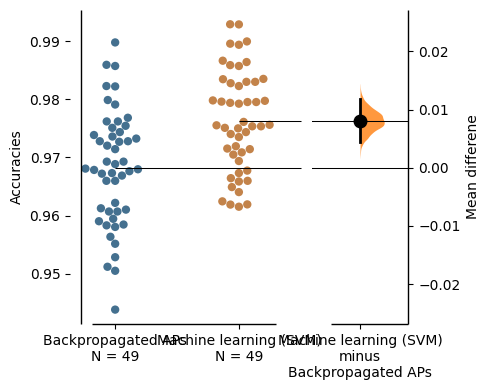

In [40]:
myplot = two_groups_unpaired.mean_diff.plot(swarm_label="Accuracies", contrast_label="Mean differene")

In [41]:
myplot.set_figwidth(7)
myplot.set_figheight(3)

In [42]:
dir(myplot.axes[0])

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_

In [47]:
myplot.axes[0].set_xticklabels(['Backpropagated\nAPs\nN = 49','Machine learning\n(SVM)\nN = 49'])
#myplot.axes[1].set_xticklabels(['Machine learning\n(SVM)\n minus Backpropagated APs'])

/tmp/ipykernel_78614/774613359.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  myplot.axes[0].set_xticklabels(['Backpropagated\nAPs\nN = 49','Machine learning\n(SVM)\nN = 49'])


[Text(0, 0, 'Backpropagated\nAPs\nN = 49'),
 Text(1, 0, 'Machine learning\n(SVM)\nN = 49')]

In [48]:
myplot.axes[1].get_xticklabels()

[Text(0, 0, ''),
 Text(1, 0, 'Machine learning (SVM)\nminus\nBackpropagated APs')]

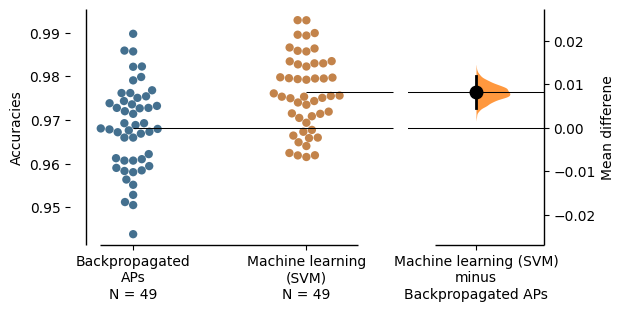

In [49]:
myplot

In [50]:
fig = myplot.get_figure()
# fig.set_figwidth(7)
# fig.set_figheight(3)
fig.savefig('Estimation_svm_vs_backprop_all.pdf')
fig.savefig('Estimation_svm_vs_backprop_all.png')

/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/dabest/plotter.py:525: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  legend_handles_unique = (pd.Series(legend_handles).loc[unique_idx]).tolist()


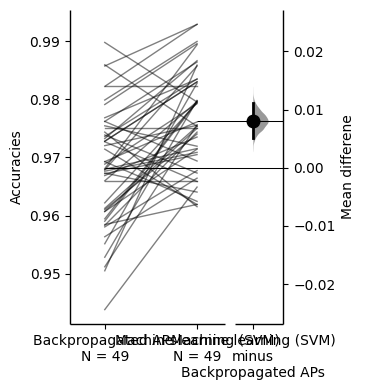

In [55]:
myplot_paired = two_groups_paired.mean_diff.plot(swarm_label="Accuracies", contrast_label="Mean differene")

In [64]:
myplot_paired.set_figwidth(10)
myplot_paired.set_figheight(3)

In [65]:
myplot_paired.axes[0].set_xticklabels(['Backpropagated\nAPs\nN = 49','Machine learning\n(SVM)\nN = 49'])
#myplot.axes[1].set_xticklabels(['Machine learning\n(SVM)\n minus Backpropagated APs'])

[Text(0, 0, 'Backpropagated\nAPs\nN = 49'),
 Text(1, 0, 'Machine learning\n(SVM)\nN = 49')]

In [66]:
myplot_paired.axes[1].get_xticklabels()

[Text(0, 0, ''),
 Text(1, 0, 'Machine learning (SVM)\nminus\nBackpropagated APs')]

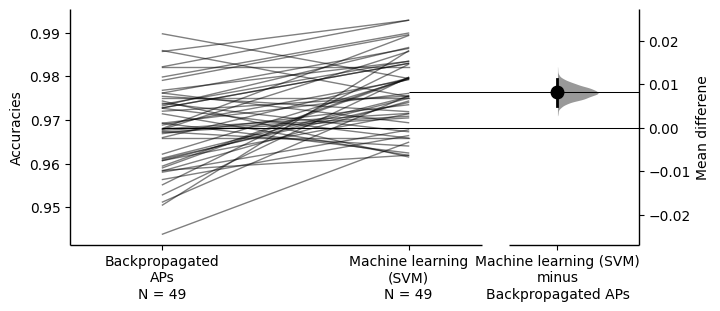

In [69]:
myplot_paired

In [70]:
fig = myplot_paired.get_figure()
# fig.set_figwidth(7)
# fig.set_figheight(3)
fig.savefig('Estimation_svm_vs_backprop_all_paired.pdf')
fig.savefig('Estimation_svm_vs_backprop_all_paired.png')

In [19]:
#two_groups_unpaired.cohens_d.plot(swarm_label="Accuracies", contrast_label="The bootstrap\ndistribtions!")

In [20]:
#two_groups_unpaired.hedges_g.plot(swarm_label="Accuracies", contrast_label="The bootstrap\ndistribtions!")

In [21]:
#two_groups_unpaired.cliffs_delta.plot(swarm_label="Accuracies", contrast_label="The bootstrap\ndistribtions!")

In [76]:
two_groups_paired.mean_diff

DABEST v0.3.1
             
Good afternoon!
The current time is Fri Nov  4 17:01:51 2022.

The paired mean difference between Backpropagated APs and Machine learning (SVM) is 0.00809 [95%CI 0.00509, 0.0112].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [150]:
two_groups_paired.mean_diff

DABEST v0.3.1
             
Good afternoon!
The current time is Fri Nov  4 17:01:51 2022.

The paired mean difference between Backpropagated APs and Machine learning (SVM) is 0.00809 [95%CI 0.00509, 0.0112].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

## TMP

In [145]:
result_df = pd.read_csv('/home/zied/workspace/other/recollection_hypothesis_redo/find_params/sdnn_origin_vs_backprop/comparison.csv')

In [146]:
result_df['svm_test_score'].mean(),result_df['backprop_test_score_pot'].mean(),result_df['backprop_test_score'].mean()

(0.9762480524740113, 0.9574000550311192, 0.9601217910162791)

In [147]:
result_df['FOLD_ID'].unique()

array([ 0,  9,  2,  4,  1,  5,  8,  3,  6,  7, 11, 14, 12, 16, 10, 15, 13,
       18, 17, 19])

In [149]:
import numpy as np
a = result_df.groupby(['APLUS','AMINUS'])['backprop_test_score'].mean()
pd.set_option('display.max_rows', 3000)
display(a)

APLUS    AMINUS 
0.00255  0.00045    0.966268
         0.00065    0.963010
         0.00085    0.956363
         0.00095    0.952881
         0.00105    0.945030
         0.00115    0.937469
         0.00125    0.930796
         0.00135    0.919836
0.00275  0.00045    0.967302
         0.00065    0.966268
         0.00085    0.963182
         0.00095    0.959591
         0.00105    0.956363
         0.00115    0.953059
         0.00125    0.945030
         0.00135    0.937469
0.00295  0.00045    0.963865
         0.00065    0.967302
         0.00085    0.966268
         0.00095    0.964592
         0.00105    0.963182
         0.00115    0.959591
         0.00125    0.956363
         0.00135    0.953223
0.00305  0.00045    0.961448
         0.00065    0.966405
         0.00085    0.967107
         0.00095    0.966268
         0.00105    0.964592
         0.00115    0.963182
         0.00125    0.959591
         0.00135    0.956363
0.00315  0.00045    0.959036
         0.00065    0.9638